In [8]:
import numpy as np
import matplotlib.pyplot as plt
#import pdt_test as fz
#import compute_charge_dist_BeforeFLASH as fz
import time
import compute_charge_dist as fz

%matplotlib inline

In [9]:
kb = 1.38e-16   # erg K-1
mp = 1.672e-24  # g
mH = 1.6733e-24 # g 
me = 9.109e-28  # g
echarge = 4.8032e-10 # esu [cm3/2 g1/2 s-1]

AAtocm = 1.0e-8

In [10]:
# Draine Book. Figure 25.2a (2003)

nH    = 30.         # in cm-3
nC    = nH * 1.0e-4 
T     = 100        # in Kelvin
xHp   = 1.0e-3       #1.0e-3     # electron fraction.
xCp   = 1.0
Ndust = 0.0
Av    = Ndust / 1.0e22 

grain_type = "carbonaceous"

mu = 1.0    # mean mass per particle, un units of proton masses.
mm = mu * mp  # particle mass

In [11]:
grain_size = 100.

Qabs = fz.get_QabsTable(grain_type, grain_size)

Jpe, Je, Jh, Jc, ZZall = fz.compute_currents([nH, nC], [xHp, xCp], 0., T, 0.0, grain_size, Av, grain_type, Qabs)
zeq                    = fz.get_zeq_vec     (Jpe, Je, Jh, Jc, np.zeros_like(Je), np.zeros_like(Je), ZZall, grain_size, grain_type, )
new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH, nC], [xHp, xCp], 0., T, 0., grain_size, Av, grain_type, Qabs, 0., zeq=zeq, )
ffz, ffzlog, ZZ        = fz.vector_fz(Jpe, Je, Jh, Jc,np.zeros_like(Je),np.zeros_like(Je), ZZall, new_zmin, new_zmax)
tauz                   = fz.tauz_vec(Jpe, Je, Jh, Jc, ZZall, ffz, new_zmin, new_zmax)

Zm     = fz.get_Zmode(ZZ, ffz)
zmode  = Zm

avg, std  = fz.weighted_avg_and_std(ZZ, ffz)
zmean     = avg
zstd      = std

In [12]:
print(zmean, zstd)

(2.3470942274032027, 1.681243626896167)


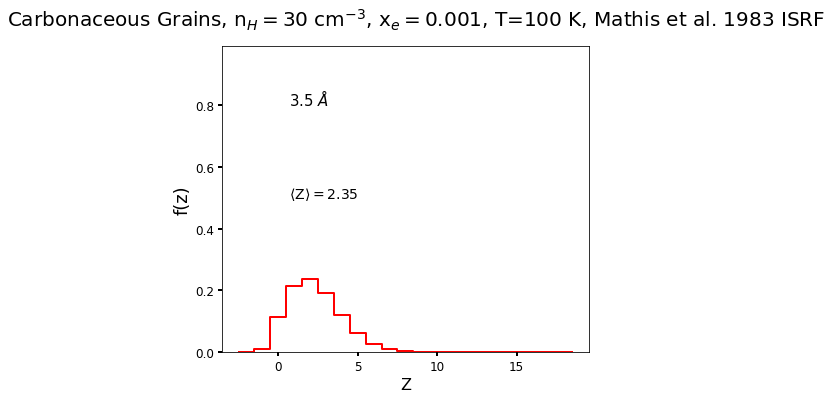

In [13]:
xsize = 6
ysize = 5

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.04
wpad = 0.065

############################################################################################################
############################                a = 3.5 - 15 AA               #######################################
############################################################################################################

ax = fig.add_axes([0, 0, 1, 1])

#ax.plot([0,1], [0,1], visible=False)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.text(0.5, 0.955, "Carbonaceous Grains, n$_{H}=30$ cm$^{-3}$, x$_{e}=0.001$, T=100 K, Mathis et al. 1983 ISRF", fontsize=20, horizontalalignment='center')

plt.axis('off')


#ax = fig.add_subplot(651)

ax = fig.add_axes([0.05, 0.05, 0.85, 0.85])



#ax.plot(Z_a_3_100+0.5, fz_3A, "-k", linewidth=2, drawstyle='steps', alpha=0.8)
ax.plot(ZZ+0.5, ffz, "-r", linewidth=2, drawstyle='steps', alpha=1.0)

#ax.set_xlim(np.min(Z_a_3_100)+0.1, np.max(Z_a_3_100)-0.1)
ax.set_ylim(0, 0.99)

ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off

ax.set_ylabel("f(z)", fontsize=18)
ax.set_xlabel("Z", fontsize=16)

ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=12)

ax.text(0.7, 0.8, "3.5 $\\AA$", fontsize=15)
#ax.text(0.7, 0.65, "$\\langle$Z$\\rangle_{D03}=%.3f$"%-0.025, fontsize=14)
ax.text(0.7, 0.5, "$\\langle$Z$\\rangle =%.2f$"%zmean, fontsize=14)

fig.show()

In [15]:
grain_size = 3.5

start3 = time.clock()

print("Grain size", grain_size, "Angstroms")
print("")

Qabs = fz.get_QabsTable(grain_type, grain_size)

Jpe, Je, Jh, Jc, ZZall = fz.compute_currents([nH, nC], [xHp, xCp], 0., T, 0.0, grain_size, Av, grain_type, Qabs)
zeq                    = fz.get_zeq_vec     (Jpe, Je, Jh, Jc, np.zeros_like(Je), np.zeros_like(Je), ZZall, grain_size, grain_type, )
new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH, nC], [xHp, xCp], 0., T, 0., grain_size, Av, grain_type, Qabs, 0., zeq=zeq, )
ffz, ffzlog, ZZ        = fz.vector_fz(Jpe, Je, Jh, Jc,np.zeros_like(Je),np.zeros_like(Je), ZZall, new_zmin, new_zmax)
tauz                   = fz.tauz_vec(Jpe, Je, Jh, Jc, ZZall, ffz, new_zmin, new_zmax)

avg, std  = fz.weighted_avg_and_std(ZZ, ffz)

Zav_3     = avg
Z_3       = ZZ
fz_3      = ffz

end3 = time.clock()

#-----------------------------------------------------------------------------------------------------------------------

start5 = time.clock()

grain_size = 5.0

print("Grain size", grain_size, "Angstroms")
print("")

Qabs = fz.get_QabsTable(grain_type, grain_size)

Jpe, Je, Jh, Jc, ZZall = fz.compute_currents([nH, nC], [xHp, xCp], 0., T, 0.0, grain_size, Av, grain_type, Qabs)
zeq                    = fz.get_zeq_vec     (Jpe, Je, Jh, Jc, np.zeros_like(Je), np.zeros_like(Je), ZZall, grain_size, grain_type, )
new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH, nC], [xHp, xCp], 0., T, 0., grain_size, Av, grain_type, Qabs, 0., zeq=zeq, )
ffz, ffzlog, ZZ        = fz.vector_fz(Jpe, Je, Jh, Jc,np.zeros_like(Je),np.zeros_like(Je), ZZall, new_zmin, new_zmax)
tauz                   = fz.tauz_vec(Jpe, Je, Jh, Jc, ZZall, ffz, new_zmin, new_zmax)

avg, std  = fz.weighted_avg_and_std(ZZ, ffz)

Zav_5     = avg
Z_5       = ZZ
fz_5      = ffz

end5 = time.clock()


#-----------------------------------------------------------------------------------------------------------------------

start7 = time.clock()

grain_size = 7.0

print("Grain size", grain_size, "Angstroms")
print("")

Qabs = fz.get_QabsTable(grain_type, grain_size)

Jpe, Je, Jh, Jc, ZZall = fz.compute_currents([nH, nC], [xHp, xCp], 0., T, 0.0, grain_size, Av, grain_type, Qabs)
zeq                    = fz.get_zeq_vec     (Jpe, Je, Jh, Jc, np.zeros_like(Je), np.zeros_like(Je), ZZall, grain_size, grain_type, )
new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH, nC], [xHp, xCp], 0., T, 0., grain_size, Av, grain_type, Qabs, 0., zeq=zeq, )
ffz, ffzlog, ZZ        = fz.vector_fz(Jpe, Je, Jh, Jc,np.zeros_like(Je),np.zeros_like(Je), ZZall, new_zmin, new_zmax)
tauz                   = fz.tauz_vec(Jpe, Je, Jh, Jc, ZZall, ffz, new_zmin, new_zmax)

avg, std  = fz.weighted_avg_and_std(ZZ, ffz)

Zav_7     = avg
Z_7       = ZZ
fz_7      = ffz


end7 = time.clock()
#-----------------------------------------------------------------------------------------------------------------------

start10 = time.clock()

grain_size = 10.0

print("Grain size", grain_size, "Angstroms")
print("")

Qabs = fz.get_QabsTable(grain_type, grain_size)

Jpe, Je, Jh, Jc, ZZall = fz.compute_currents([nH, nC], [xHp, xCp], 0., T, 0.0, grain_size, Av, grain_type, Qabs)
zeq                    = fz.get_zeq_vec     (Jpe, Je, Jh, Jc, np.zeros_like(Je), np.zeros_like(Je), ZZall, grain_size, grain_type, )
new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH, nC], [xHp, xCp], 0., T, 0., grain_size, Av, grain_type, Qabs, 0., zeq=zeq, )
ffz, ffzlog, ZZ        = fz.vector_fz(Jpe, Je, Jh, Jc,np.zeros_like(Je),np.zeros_like(Je), ZZall, new_zmin, new_zmax)
tauz                   = fz.tauz_vec(Jpe, Je, Jh, Jc, ZZall, ffz, new_zmin, new_zmax)

avg, std  = fz.weighted_avg_and_std(ZZ, ffz)

Zav_10     = avg
Z_10       = ZZ
fz_10      = ffz

end10 = time.clock()
#-----------------------------------------------------------------------------------------------------------------------

start15 = time.clock()

grain_size = 15.0

print("Grain size", grain_size, "Angstroms")
print("")

Qabs = fz.get_QabsTable(grain_type, grain_size)

Jpe, Je, Jh, Jc, ZZall = fz.compute_currents([nH, nC], [xHp, xCp], 0., T, 0.0, grain_size, Av, grain_type, Qabs)
zeq                    = fz.get_zeq_vec     (Jpe, Je, Jh, Jc, np.zeros_like(Je), np.zeros_like(Je), ZZall, grain_size, grain_type, )
new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH, nC], [xHp, xCp], 0., T, 0., grain_size, Av, grain_type, Qabs, 0., zeq=zeq, )
ffz, ffzlog, ZZ        = fz.vector_fz(Jpe, Je, Jh, Jc,np.zeros_like(Je),np.zeros_like(Je), ZZall, new_zmin, new_zmax)
tauz                   = fz.tauz_vec(Jpe, Je, Jh, Jc, ZZall, ffz, new_zmin, new_zmax)

avg, std  = fz.weighted_avg_and_std(ZZ, ffz)

Zav_15     = avg
Z_15       = ZZ
fz_15      = ffz

end15 = time.clock()
#-----------------------------------------------------------------------------------------------------------------------

start20 = time.clock()

grain_size = 20.0

print("Grain size", grain_size, "Angstroms")
print("")

Qabs = fz.get_QabsTable(grain_type, grain_size)

Jpe, Je, Jh, Jc, ZZall = fz.compute_currents([nH, nC], [xHp, xCp], 0., T, 0.0, grain_size, Av, grain_type, Qabs)
zeq                    = fz.get_zeq_vec     (Jpe, Je, Jh, Jc, np.zeros_like(Je), np.zeros_like(Je), ZZall, grain_size, grain_type, )
new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH, nC], [xHp, xCp], 0., T, 0., grain_size, Av, grain_type, Qabs, 0., zeq=zeq, )
ffz, ffzlog, ZZ        = fz.vector_fz(Jpe, Je, Jh, Jc,np.zeros_like(Je),np.zeros_like(Je), ZZall, new_zmin, new_zmax)
tauz                   = fz.tauz_vec(Jpe, Je, Jh, Jc, ZZall, ffz, new_zmin, new_zmax)

avg, std  = fz.weighted_avg_and_std(ZZ, ffz)

Zav_20     = avg
Z_20       = ZZ
fz_20      = ffz

end20 = time.clock()
#-----------------------------------------------------------------------------------------------------------------------

start30 = time.clock()

grain_size = 30.0

print("Grain size", grain_size, "Angstroms")
print("")

Qabs = fz.get_QabsTable(grain_type, grain_size)

Jpe, Je, Jh, Jc, ZZall = fz.compute_currents([nH, nC], [xHp, xCp], 0., T, 0.0, grain_size, Av, grain_type, Qabs)
zeq                    = fz.get_zeq_vec     (Jpe, Je, Jh, Jc, np.zeros_like(Je), np.zeros_like(Je), ZZall, grain_size, grain_type, )
new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH, nC], [xHp, xCp], 0., T, 0., grain_size, Av, grain_type, Qabs, 0., zeq=zeq, )
ffz, ffzlog, ZZ        = fz.vector_fz(Jpe, Je, Jh, Jc,np.zeros_like(Je),np.zeros_like(Je), ZZall, new_zmin, new_zmax)
tauz                   = fz.tauz_vec(Jpe, Je, Jh, Jc, ZZall, ffz, new_zmin, new_zmax)

avg, std  = fz.weighted_avg_and_std(ZZ, ffz)

Zav_30     = avg
Z_30       = ZZ
fz_30      = ffz

end30 = time.clock()
#-----------------------------------------------------------------------------------------------------------------------

start50 = time.clock()

grain_size = 50.0

print("Grain size", grain_size, "Angstroms")
print("")

Qabs = fz.get_QabsTable(grain_type, grain_size)

Jpe, Je, Jh, Jc, ZZall = fz.compute_currents([nH, nC], [xHp, xCp], 0., T, 0.0, grain_size, Av, grain_type, Qabs)
zeq                    = fz.get_zeq_vec     (Jpe, Je, Jh, Jc, np.zeros_like(Je), np.zeros_like(Je), ZZall, grain_size, grain_type, )
new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH, nC], [xHp, xCp], 0., T, 0., grain_size, Av, grain_type, Qabs, 0., zeq=zeq, )
ffz, ffzlog, ZZ        = fz.vector_fz(Jpe, Je, Jh, Jc,np.zeros_like(Je),np.zeros_like(Je), ZZall, new_zmin, new_zmax)
tauz                   = fz.tauz_vec(Jpe, Je, Jh, Jc, ZZall, ffz, new_zmin, new_zmax)

avg, std  = fz.weighted_avg_and_std(ZZ, ffz)

Zav_50     = avg
Z_50       = ZZ
fz_50      = ffz

end50 = time.clock()
#-----------------------------------------------------------------------------------------------------------------------

start70 = time.clock()

grain_size = 70.0

print("Grain size", grain_size, "Angstroms")
print("")

Qabs = fz.get_QabsTable(grain_type, grain_size)

Jpe, Je, Jh, Jc, ZZall = fz.compute_currents([nH, nC], [xHp, xCp], 0., T, 0.0, grain_size, Av, grain_type, Qabs)
zeq                    = fz.get_zeq_vec     (Jpe, Je, Jh, Jc, np.zeros_like(Je), np.zeros_like(Je), ZZall, grain_size, grain_type, )
new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH, nC], [xHp, xCp], 0., T, 0., grain_size, Av, grain_type, Qabs, 0., zeq=zeq, )
ffz, ffzlog, ZZ        = fz.vector_fz(Jpe, Je, Jh, Jc,np.zeros_like(Je),np.zeros_like(Je), ZZall, new_zmin, new_zmax)
tauz                   = fz.tauz_vec(Jpe, Je, Jh, Jc, ZZall, ffz, new_zmin, new_zmax)

avg, std  = fz.weighted_avg_and_std(ZZ, ffz)
    
fz_70   = ffz
Z_70    = ZZ
Zavg_70 = avg

end70 = time.clock()
#-----------------------------------------------------------------------------------------------------------------------

start100 = time.clock()

grain_size = 100.0

print("Grain size", grain_size, "Angstroms")
print("")

Qabs = fz.get_QabsTable(grain_type, grain_size)

Jpe, Je, Jh, Jc, ZZall = fz.compute_currents([nH, nC], [xHp, xCp], 0., T, 0.0, grain_size, Av, grain_type, Qabs)
zeq                    = fz.get_zeq_vec     (Jpe, Je, Jh, Jc, np.zeros_like(Je), np.zeros_like(Je), ZZall, grain_size, grain_type, )
new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH, nC], [xHp, xCp], 0., T, 0., grain_size, Av, grain_type, Qabs, 0., zeq=zeq, )
ffz, ffzlog, ZZ        = fz.vector_fz(Jpe, Je, Jh, Jc,np.zeros_like(Je),np.zeros_like(Je), ZZall, new_zmin, new_zmax)
tauz                   = fz.tauz_vec(Jpe, Je, Jh, Jc, ZZall, ffz, new_zmin, new_zmax)

avg, std  = fz.weighted_avg_and_std(ZZ, ffz)
    
fz_100   = ffz
Z_100    = ZZ
Zavg_100 = avg

end100 = time.clock()
#-----------------------------------------------------------------------------------------------------------------------

start150 = time.clock()

grain_size = 150.0

print("Grain size", grain_size, "Angstroms")
print("")

Qabs = fz.get_QabsTable(grain_type, grain_size)

Jpe, Je, Jh, Jc, ZZall = fz.compute_currents([nH, nC], [xHp, xCp], 0., T, 0.0, grain_size, Av, grain_type, Qabs)
zeq                    = fz.get_zeq_vec     (Jpe, Je, Jh, Jc, np.zeros_like(Je), np.zeros_like(Je), ZZall, grain_size, grain_type, )
new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH, nC], [xHp, xCp], 0., T, 0., grain_size, Av, grain_type, Qabs, 0., zeq=zeq, )
ffz, ffzlog, ZZ        = fz.vector_fz(Jpe, Je, Jh, Jc,np.zeros_like(Je),np.zeros_like(Je), ZZall, new_zmin, new_zmax)
tauz                   = fz.tauz_vec(Jpe, Je, Jh, Jc, ZZall, ffz, new_zmin, new_zmax)

avg, std  = fz.weighted_avg_and_std(ZZ, ffz)
    
fz_150   = ffz
Z_150    = ZZ
Zavg_150 = avg

end150 = time.clock()
#-----------------------------------------------------------------------------------------------------------------------

start200 = time.clock()

grain_size = 200.0

print("Grain size", grain_size, "Angstroms")
print("")

Qabs = fz.get_QabsTable(grain_type, grain_size)

Jpe, Je, Jh, Jc, ZZall = fz.compute_currents([nH, nC], [xHp, xCp], 0., T, 0.0, grain_size, Av, grain_type, Qabs)
zeq                    = fz.get_zeq_vec     (Jpe, Je, Jh, Jc, np.zeros_like(Je), np.zeros_like(Je), ZZall, grain_size, grain_type, )
new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH, nC], [xHp, xCp], 0., T, 0., grain_size, Av, grain_type, Qabs, 0., zeq=zeq, )
ffz, ffzlog, ZZ        = fz.vector_fz(Jpe, Je, Jh, Jc,np.zeros_like(Je),np.zeros_like(Je), ZZall, new_zmin, new_zmax)
tauz                   = fz.tauz_vec(Jpe, Je, Jh, Jc, ZZall, ffz, new_zmin, new_zmax)

avg, std  = fz.weighted_avg_and_std(ZZ, ffz)
    
fz_200   = ffz
Z_200    = ZZ
Zavg_200 = avg

end200 = time.clock()
#-----------------------------------------------------------------------------------------------------------------------

start300 = time.clock()

grain_size = 300.0

print("Grain size", grain_size, "Angstroms")
print("")

Qabs = fz.get_QabsTable(grain_type, grain_size)

Jpe, Je, Jh, Jc, ZZall = fz.compute_currents([nH, nC], [xHp, xCp], 0., T, 0.0, grain_size, Av, grain_type, Qabs)
zeq                    = fz.get_zeq_vec     (Jpe, Je, Jh, Jc, np.zeros_like(Je), np.zeros_like(Je), ZZall, grain_size, grain_type, )
new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH, nC], [xHp, xCp], 0., T, 0., grain_size, Av, grain_type, Qabs, 0., zeq=zeq, )
ffz, ffzlog, ZZ        = fz.vector_fz(Jpe, Je, Jh, Jc,np.zeros_like(Je),np.zeros_like(Je), ZZall, new_zmin, new_zmax)
tauz                   = fz.tauz_vec(Jpe, Je, Jh, Jc, ZZall, ffz, new_zmin, new_zmax)

avg, std  = fz.weighted_avg_and_std(ZZ, ffz)
    
fz_300   = ffz
Z_300    = ZZ
Zavg_300 = avg

end300 = time.clock()
#-----------------------------------------------------------------------------------------------------------------------

start500 = time.clock()

grain_size = 500.0

print("Grain size", grain_size, "Angstroms")
print("")


Qabs = fz.get_QabsTable(grain_type, grain_size)

Jpe, Je, Jh, Jc, ZZall = fz.compute_currents([nH, nC], [xHp, xCp], 0., T, 0.0, grain_size, Av, grain_type, Qabs)
zeq                    = fz.get_zeq_vec     (Jpe, Je, Jh, Jc, np.zeros_like(Je), np.zeros_like(Je), ZZall, grain_size, grain_type, )
new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH, nC], [xHp, xCp], 0., T, 0., grain_size, Av, grain_type, Qabs, 0., zeq=zeq, )
ffz, ffzlog, ZZ        = fz.vector_fz(Jpe, Je, Jh, Jc,np.zeros_like(Je),np.zeros_like(Je), ZZall, new_zmin, new_zmax)
tauz                   = fz.tauz_vec(Jpe, Je, Jh, Jc, ZZall, ffz, new_zmin, new_zmax)

avg, std  = fz.weighted_avg_and_std(ZZ, ffz)

fz_500   = ffz
Z_500    = ZZ
Zavg_500 = avg

end500 = time.clock()

#-----------------------------------------------------------------------------------------------------------------------

start700 = time.clock()

grain_size = 700.0

print("Grain size", grain_size, "Angstroms")
print("")

Qabs = fz.get_QabsTable(grain_type, grain_size)

Jpe, Je, Jh, Jc, ZZall = fz.compute_currents([nH, nC], [xHp, xCp], 0., T, 0.0, grain_size, Av, grain_type, Qabs)
zeq                    = fz.get_zeq_vec     (Jpe, Je, Jh, Jc, np.zeros_like(Je), np.zeros_like(Je), ZZall, grain_size, grain_type, )
new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH, nC], [xHp, xCp], 0., T, 0., grain_size, Av, grain_type, Qabs, 0., zeq=zeq, )
ffz, ffzlog, ZZ        = fz.vector_fz(Jpe, Je, Jh, Jc,np.zeros_like(Je),np.zeros_like(Je), ZZall, new_zmin, new_zmax)
tauz                   = fz.tauz_vec(Jpe, Je, Jh, Jc, ZZall, ffz, new_zmin, new_zmax)

avg, std  = fz.weighted_avg_and_std(ZZ, ffz)
    
fz_700   = ffz
Z_700    = ZZ
Zavg_700 = avg

end700 = time.clock()
#-----------------------------------------------------------------------------------------------------------------------


('Grain size', 3.5, 'Angstroms')

I'm looking for a grain size smaller than 10 Angstrom. Outside the tabulated data!!!
Extrapolating is kinda not working so taking the Qabs, a=10 AA 
('Grain size', 5.0, 'Angstroms')

I'm looking for a grain size smaller than 10 Angstrom. Outside the tabulated data!!!
Extrapolating is kinda not working so taking the Qabs, a=10 AA 
('Grain size', 7.0, 'Angstroms')

I'm looking for a grain size smaller than 10 Angstrom. Outside the tabulated data!!!
Extrapolating is kinda not working so taking the Qabs, a=10 AA 
('Grain size', 10.0, 'Angstroms')

('Grain size', 15.0, 'Angstroms')

('Grain size', 20.0, 'Angstroms')

('Grain size', 30.0, 'Angstroms')

('Grain size', 50.0, 'Angstroms')

('Grain size', 70.0, 'Angstroms')

('Grain size', 100.0, 'Angstroms')

('Grain size', 150.0, 'Angstroms')

('Grain size', 200.0, 'Angstroms')

('Grain size', 300.0, 'Angstroms')

('Grain size', 500.0, 'Angstroms')

('Grain size', 700.0, 'Angstroms')



In [16]:
start1000 = time.clock()

grain_size = 1000.0

print("Grain size", grain_size, "Angstroms")
print("")

Qabs = fz.get_QabsTable(grain_type, grain_size)

Jpe, Je, Jh, Jc, ZZall = fz.compute_currents([nH, nC], [xHp, xCp], 0., T, 0.0, grain_size, Av, grain_type, Qabs)
zeq                    = fz.get_zeq_vec     (Jpe, Je, Jh, Jc, np.zeros_like(Je), np.zeros_like(Je), ZZall, grain_size, grain_type, )
new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH, nC], [xHp, xCp], 0., T, 0., grain_size, Av, grain_type, Qabs, 0., zeq=zeq, )
ffz, ffzlog, ZZ        = fz.vector_fz(Jpe, Je, Jh, Jc,np.zeros_like(Je),np.zeros_like(Je), ZZall, new_zmin, new_zmax)
tauz                   = fz.tauz_vec(Jpe, Je, Jh, Jc, ZZall, ffz, new_zmin, new_zmax)

avg, std  = fz.weighted_avg_and_std(ZZ, ffz)
    
fz_1000   = ffz
Z_1000    = ZZ
Zavg_1000 = avg

end1000 = time.clock()
#-----------------------------------------------------------------------------------------------------------------------

start1500 = time.clock()

grain_size = 1500.0

print("Grain size", grain_size, "Angstroms")
print("")

Qabs = fz.get_QabsTable(grain_type, grain_size)

Jpe, Je, Jh, Jc, ZZall = fz.compute_currents([nH, nC], [xHp, xCp], 0., T, 0.0, grain_size, Av, grain_type, Qabs)
zeq                    = fz.get_zeq_vec     (Jpe, Je, Jh, Jc, np.zeros_like(Je), np.zeros_like(Je), ZZall, grain_size, grain_type, )
new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH, nC], [xHp, xCp], 0., T, 0., grain_size, Av, grain_type, Qabs, 0., zeq=zeq, )
ffz, ffzlog, ZZ        = fz.vector_fz(Jpe, Je, Jh, Jc,np.zeros_like(Je),np.zeros_like(Je), ZZall, new_zmin, new_zmax)
tauz                   = fz.tauz_vec(Jpe, Je, Jh, Jc, ZZall, ffz, new_zmin, new_zmax)

avg, std  = fz.weighted_avg_and_std(ZZ, ffz)
    
fz_1500   = ffz
Z_1500    = ZZ
Zavg_1500 = avg

end1500 = time.clock()
#-----------------------------------------------------------------------------------------------------------------------

start2000 = time.clock()

grain_size = 2000.0

print("Grain size", grain_size, "Angstroms")
print("")

Qabs = fz.get_QabsTable(grain_type, grain_size)

Jpe, Je, Jh, Jc, ZZall = fz.compute_currents([nH, nC], [xHp, xCp], 0., T, 0.0, grain_size, Av, grain_type, Qabs)
zeq                    = fz.get_zeq_vec     (Jpe, Je, Jh, Jc, np.zeros_like(Je), np.zeros_like(Je), ZZall, grain_size, grain_type, )
new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH, nC], [xHp, xCp], 0., T, 0., grain_size, Av, grain_type, Qabs, 0., zeq=zeq, )
ffz, ffzlog, ZZ        = fz.vector_fz(Jpe, Je, Jh, Jc,np.zeros_like(Je),np.zeros_like(Je), ZZall, new_zmin, new_zmax)
tauz                   = fz.tauz_vec(Jpe, Je, Jh, Jc, ZZall, ffz, new_zmin, new_zmax)

avg, std  = fz.weighted_avg_and_std(ZZ, ffz)
    
fz_2000   = ffz
Z_2000    = ZZ
Zavg_2000 = avg

end2000 = time.clock()

#-----------------------------------------------------------------------------------------------------------------------

start3000 = time.clock()

grain_size = 3000.0

print("Grain size", grain_size, "Angstroms")
print("")

Qabs = fz.get_QabsTable(grain_type, grain_size)

Jpe, Je, Jh, Jc, ZZall = fz.compute_currents([nH, nC], [xHp, xCp], 0., T, 0.0, grain_size, Av, grain_type, Qabs)
zeq                    = fz.get_zeq_vec     (Jpe, Je, Jh, Jc, np.zeros_like(Je), np.zeros_like(Je), ZZall, grain_size, grain_type, )
new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH, nC], [xHp, xCp], 0., T, 0., grain_size, Av, grain_type, Qabs, 0., zeq=zeq, )
ffz, ffzlog, ZZ        = fz.vector_fz(Jpe, Je, Jh, Jc,np.zeros_like(Je),np.zeros_like(Je), ZZall, new_zmin, new_zmax)
tauz                   = fz.tauz_vec(Jpe, Je, Jh, Jc, ZZall, ffz, new_zmin, new_zmax)

avg, std  = fz.weighted_avg_and_std(ZZ, ffz)
    
fz_3000   = ffz
Z_3000    = ZZ
Zavg_3000 = avg

end3000 = time.clock()
#-----------------------------------------------------------------------------------------------------------------------

start5000 = time.clock()

grain_size = 5000.0

print("Grain size", grain_size, "Angstroms")
print("")


Qabs = fz.get_QabsTable(grain_type, grain_size)

Jpe, Je, Jh, Jc, ZZall = fz.compute_currents([nH, nC], [xHp, xCp], 0., T, 0.0, grain_size, Av, grain_type, Qabs)
zeq                    = fz.get_zeq_vec     (Jpe, Je, Jh, Jc, np.zeros_like(Je), np.zeros_like(Je), ZZall, grain_size, grain_type, )
new_zmin, new_zmax     = fz.get_new_zmin_zmax([nH, nC], [xHp, xCp], 0., T, 0., grain_size, Av, grain_type, Qabs, 0., zeq=zeq, )
ffz, ffzlog, ZZ        = fz.vector_fz(Jpe, Je, Jh, Jc,np.zeros_like(Je),np.zeros_like(Je), ZZall, new_zmin, new_zmax)
tauz                   = fz.tauz_vec(Jpe, Je, Jh, Jc, ZZall, ffz, new_zmin, new_zmax)

avg, std  = fz.weighted_avg_and_std(ZZ, ffz)
    
fz_5000   = ffz
Z_5000    = ZZ
Zavg_5000 = avg

end5000 = time.clock()


('Grain size', 1000.0, 'Angstroms')

('Grain size', 1500.0, 'Angstroms')

('Grain size', 2000.0, 'Angstroms')

('Grain size', 3000.0, 'Angstroms')

('Grain size', 5000.0, 'Angstroms')



In [17]:
time3 = end3 - start3
time5 = end5 - start5
time7 = end7 - start7
time10 = end10 - start10
time15 = end15 - start15
time20 = end20 - start20
time30 = end30 - start30
time50 = end50 - start50
time70 = end70 - start70
time100 = end100 - start100
time200 = end200 - start200
time300 = end300 - start300
time500 = end500 - start500
time700 = end700 - start700
time1000 = end1000 - start1000
time1500 = end1500 - start1500
time3000 = end3000 - start3000
time5000 = end5000 - start5000

In [18]:
print("-----------------------------------------------------------")
print("Time taken running each grain:")
print("3.5 AA t=", time3)
print("5 AA t=", time5)
print("7 AA t=", time7)
print("10 AA t=", time10)
print("15 AA t=", time15)
print("20 AA t=", time20)
print("30 AA t=", time30)
print("50 AA t=", time50)
print("70 AA t=", time70)
print("100 AA t=", time100)
print("200 AA t=", time200)
print("300 AA t=", time300)
print("500 AA t=", time500)
print("700 AA t=", time700)
print("1000 AA t=", time1000)
print("1500 AA t=", time1500)
print("3000 AA t=", time3000)
print("5000 AA t=", time5000)

-----------------------------------------------------------
Time taken running each grain:
('3.5 AA t=', 0.10845899999999986)
('5 AA t=', 0.22341199999999972)
('7 AA t=', 0.02606399999999809)
('10 AA t=', 0.4367599999999996)
('15 AA t=', 0.9062459999999994)
('20 AA t=', 0.9386569999999992)
('30 AA t=', 1.1036159999999988)
('50 AA t=', 2.085298999999999)
('70 AA t=', 2.2511019999999995)
('100 AA t=', 4.866387000000003)
('200 AA t=', 10.705480999999999)
('300 AA t=', 13.323419999999999)
('500 AA t=', 26.199730000000002)
('700 AA t=', 69.24080099999999)
('1000 AA t=', 161.152591)
('1500 AA t=', 444.99208600000003)
('3000 AA t=', 2395.106055)
('5000 AA t=', 8268.240469999999)


In [19]:
new_fz_3 = np.insert(fz_3, 0, 0)
fz_3 = np.insert(new_fz_3, len(new_fz_3), 0)

new_Z_3 = np.insert(Z_3, 0, min(Z_3)-1)
Z_3 = np.insert(new_Z_3, len(new_Z_3)-1, max(Z_3)+1)

new_fz_5 = np.insert(fz_5, 0, 0)
fz_5 = np.insert(new_fz_5, len(new_fz_5), 0)

new_Z_5 = np.insert(Z_5, 0, min(Z_5)-1)
Z_5 = np.insert(new_Z_5, len(new_Z_5)-1, max(Z_5)+1)

In [20]:
Z_a_3_100 = np.array([-3, -2, -1, 0, 1, 2, 3, 4, 5])

fz_3A  = np.array([0.0, 0.0, 0.06, 0.92, 0.02, 0.0, 0.0, 0.0, 0.0])
fz_5A  = np.array([0.0, 0.0, 0.14, 0.81, 0.05, 0.0, 0.0, 0.0, 0.0])
fz_7A  = np.array([0.0, 0.0, 0.18, 0.77, 0.05, 0.0, 0.0, 0.0, 0.0])
fz_10A = np.array([0.0, 0.0, 0.19, 0.72, 0.09, 0.0, 0.0, 0.0, 0.0])
fz_15A = np.array([0.0, 0.0, 0.16, 0.67, 0.16, 0.01, 0.0, 0.0, 0.0])
fz_20A = np.array([0.0, 0.0, 0.15, 0.64, 0.19, 0.02, 0.0, 0.0, 0.0])
fz_30A = np.array([0.0, 0.0, 0.1, 0.58, 0.28, 0.03, 0.01, 0.0, 0.0])
fz_50A = np.array([0.0, 0.0, 0.03, 0.36, 0.34, 0.19, 0.08, 0.01, 0.0])
fz_70A = np.array([0.0, 0.0, 0.03, 0.35, 0.34, 0.18, 0.09, 0.01, 0.0])
fz_100A = np.array([0.0, 0.0, 0.02, 0.22, 0.28, 0.22, 0.16, 0.07, 0.01])

Z_a150_700 = np.linspace(-3, 15, num=19)

a, b, c  = 0.2, 2.4, 1.5 
fz_150A  = a* np.exp(-(Z_a150_700 - b)**2/(2.* c**2))

a, b, c  = 0.18, 3.5, 2 
fz_200A  = a* np.exp(-(Z_a150_700 - b)**2/(2.* c**2))

a, b, c  = 0.16, 5.8, 2.5 
fz_300A  = a* np.exp(-(Z_a150_700 - b)**2/(2.* c**2))

a, b, c  = 0.14, 7.9, 2.8 
fz_500A  = a* np.exp(-(Z_a150_700 - b)**2/(2.* c**2))

a, b, c  = 0.12, 9.3, 3.2 
fz_700A  = a* np.exp(-(Z_a150_700 - b)**2/(2.* c**2))


Z_a1E3_5E3 = np.linspace(-1, 50, num=33)

a, b, c  = 0.11, 11.1, 4 
fz_1000A  = a* np.exp(-(Z_a1E3_5E3 - b)**2/(2.* c**2))

a, b, c  = 0.1, 13.9, 5 
fz_1500A  = a* np.exp(-(Z_a1E3_5E3 - b)**2/(2.* c**2))

a, b, c  = 0.099, 16.7, 5
fz_2000A  = a* np.exp(-(Z_a1E3_5E3 - b)**2/(2.* c**2))

a, b, c  = 0.097, 22.0, 6
fz_3000A  = a* np.exp(-(Z_a1E3_5E3 - b)**2/(2.* c**2))

a, b, c  = 0.07, 34.0, 7
fz_5000A  = a* np.exp(-(Z_a1E3_5E3 - b)**2/(2.* c**2))

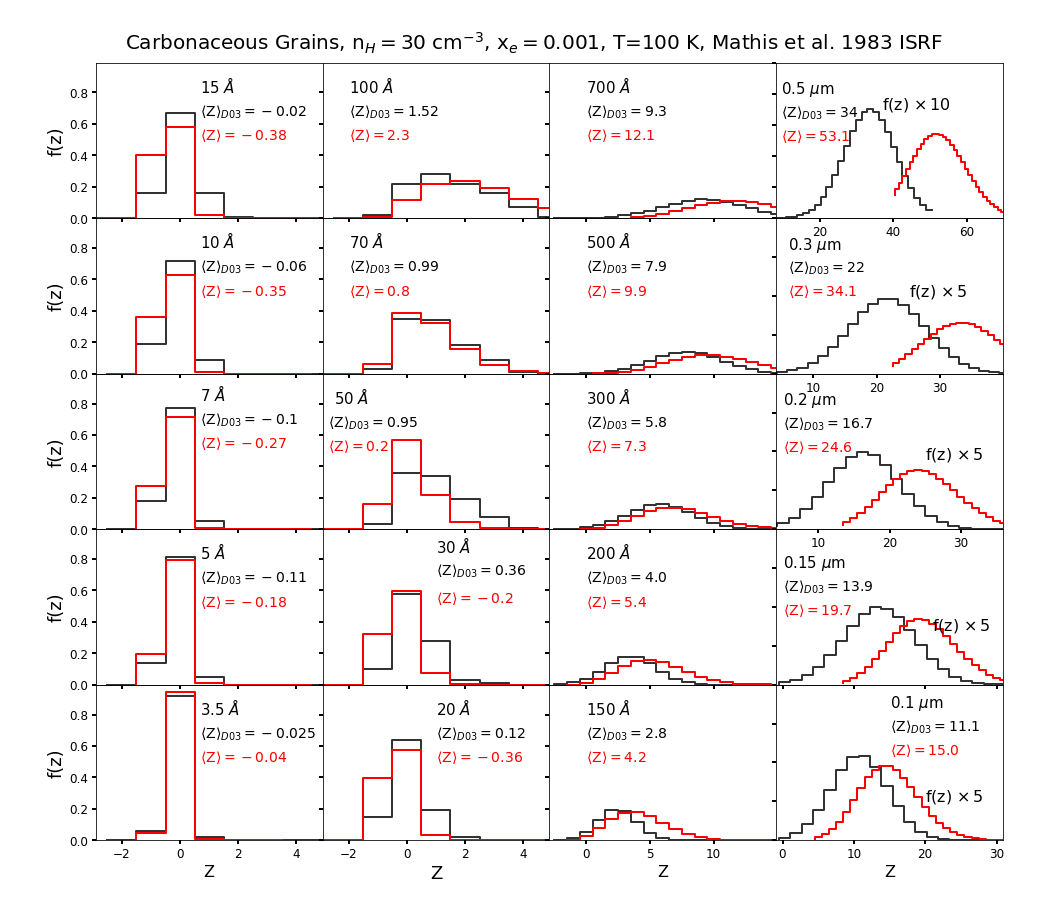

In [22]:
xsize = 14
ysize = 12

nfigs_x = 4
nfigs_y = 5

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.04
wpad = 0.065

xs_panel = 0.9 / nfigs_x 
ys_panel = 0.9 / nfigs_y 

############################################################################################################
############################                a = 3.5 - 15 AA               #######################################
############################################################################################################

ax = fig.add_axes([0, 0, 1, 1])

#ax.plot([0,1], [0,1], visible=False)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.text(0.5, 0.955, "Carbonaceous Grains, n$_{H}=30$ cm$^{-3}$, x$_{e}=0.001$, T=100 K, Mathis et al. 1983 ISRF", fontsize=20, horizontalalignment='center')

plt.axis('off')

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 0
jj = 0

#ax = fig.add_subplot(651)

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.plot(Z_a_3_100+0.5, fz_3A, "-k", linewidth=2, drawstyle='steps', alpha=0.8)
ax.plot(Z_3+0.5, fz_3, "-r", linewidth=2, drawstyle='steps', alpha=1.0)

ax.set_xlim(np.min(Z_a_3_100)+0.1, np.max(Z_a_3_100)-0.1)
ax.set_ylim(0, 0.99)

ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off

ax.set_ylabel("f(z)", fontsize=18)
ax.set_xlabel("Z", fontsize=16)

ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=12)

ax.text(0.7, 0.8, "3.5 $\\AA$", fontsize=15)
ax.text(0.7, 0.65, "$\\langle$Z$\\rangle_{D03}=%.3f$"%-0.025, fontsize=14)
ax.text(0.7, 0.5, "$\\langle$Z$\\rangle =%.2f$"%Zav_3, fontsize=14, color="red")


#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 0
jj = 1

#ax = fig.add_subplot(651)

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.plot(Z_a_3_100+0.5, fz_5A, "-k", linewidth=2, drawstyle='steps', alpha=0.8)
ax.plot(Z_5+0.5, fz_5, "-r", linewidth=2, drawstyle='steps', alpha=1.0)

ax.set_xlim(np.min(Z_a_3_100)+0.1, np.max(Z_a_3_100)-0.1)
ax.set_ylim(0, 0.99)

ax.tick_params(axis='x', which='both', bottom='on', labelbottom='off')
ax.set_ylabel("f(z)", fontsize=18)
ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=12)

ax.text(0.7, 0.8, "5 $\\AA$", fontsize=15)
ax.text(0.7, 0.65, "$\\langle$Z$\\rangle_{D03}=%.2f$"%-0.11, fontsize=14)
ax.text(0.7, 0.5, "$\\langle$Z$\\rangle       =%.2f$"%Zav_5, fontsize=14, color="red")

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 0
jj = 2

#ax = fig.add_subplot(651)

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.plot(Z_a_3_100+0.5, fz_7A, "-k", linewidth=2, drawstyle='steps', alpha=0.8)
ax.plot(Z_7+0.5, fz_7, "-r", linewidth=2, drawstyle='steps', alpha=1.0)

ax.set_xlim(np.min(Z_a_3_100)+0.1, np.max(Z_a_3_100)-0.1)
ax.set_ylim(0, 0.99)

ax.tick_params(axis='x', which='both', bottom='on', labelbottom='off')
ax.set_ylabel("f(z)", fontsize=18)
ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=12)

ax.text(0.7, 0.82, "7 $\\AA$", fontsize=15)
ax.text(0.7, 0.67, "$\\langle$Z$\\rangle_{D03}=%.1f$"%-0.1, fontsize=14)
ax.text(0.7, 0.52, "$\\langle$Z$\\rangle       =%.2f$"%Zav_7, fontsize=14, color="red")

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 0
jj = 3

#ax = fig.add_subplot(651)

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.plot(Z_a_3_100+0.5, fz_10A, "-k", linewidth=2, drawstyle='steps', alpha=0.8)
ax.plot(Z_10+0.5, fz_10, "-r", linewidth=2, drawstyle='steps', alpha=1.0)

ax.set_xlim(np.min(Z_a_3_100)+0.1, np.max(Z_a_3_100)-0.1)
ax.set_ylim(0, 0.99)

ax.tick_params(axis='x', which='both', bottom='on', labelbottom='off')
ax.set_ylabel("f(z)", fontsize=18)
ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=12)

ax.text(0.7, 0.8, "10 $\\AA$", fontsize=15)
ax.text(0.7, 0.65, "$\\langle$Z$\\rangle_{D03}=%.2f$"%-0.06, fontsize=14)
ax.text(0.7, 0.5, "$\\langle$Z$\\rangle       =%.2f$"%Zav_10, fontsize=14, color="red")


#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 0
jj = 4

#ax = fig.add_subplot(651)

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.plot(Z_a_3_100+0.5, fz_15A, "-k", linewidth=2, drawstyle='steps', alpha=0.8)
ax.plot(Z_15+0.5, fz_15, "-r", linewidth=2, drawstyle='steps', alpha=1.0)

ax.set_xlim(np.min(Z_a_3_100)+0.1, np.max(Z_a_3_100)-0.1)
ax.set_ylim(0, 0.99)

ax.tick_params(axis='x', which='both', bottom='on', labelbottom='off')
ax.set_ylabel("f(z)", fontsize=18)

ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=12)

ax.text(0.7, 0.8, "15 $\\AA$", fontsize=15)
ax.text(0.7, 0.65, "$\\langle$Z$\\rangle_{D03}=%.2f$"%-0.02, fontsize=14)
ax.text(0.7, 0.5, "$\\langle$Z$\\rangle       =%.2f$"%Zav_15, fontsize=14, color="red")


############################################################################################################
############################                a = 20-100 AA               #######################################
############################################################################################################

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 1
jj = 0

#ax = fig.add_subplot(651)

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.plot(Z_a_3_100+0.5, fz_20A, "-k", linewidth=2, drawstyle='steps', alpha=0.8)
ax.plot(Z_20+0.5, fz_20, "-r", linewidth=2, drawstyle='steps', alpha=1.0)

ax.set_xlim(np.min(Z_a_3_100)+0.1, np.max(Z_a_3_100)-0.1)
ax.set_ylim(0, 0.99)

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on', labelleft='off') # labels along the bottom edge are off


ax.set_xlabel("Z", fontsize=18)

ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=12)

ax.text(1.0, 0.8, "20 $\\AA$", fontsize=15)
ax.text(1.0, 0.65, "$\\langle$Z$\\rangle_{D03}=%.2f$"%0.12, fontsize=14)
ax.text(1.0, 0.5, "$\\langle$Z$\\rangle       =%.2f$"%Zav_20, fontsize=14, color="red")


#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 1
jj = 1

#ax = fig.add_subplot(651)

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.plot(Z_a_3_100+0.5, fz_30A, "-k", linewidth=2, drawstyle='steps', alpha=0.8)
ax.plot(Z_30+0.5, fz_30, "-r", linewidth=2, drawstyle='steps', alpha=1.0)

ax.set_xlim(np.min(Z_a_3_100)+0.1, np.max(Z_a_3_100)-0.1)
ax.set_ylim(0, 0.99)

ax.tick_params(axis='both', which='both', bottom='on', labelbottom='off', labelleft='off')
ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=12)

ax.text(1.0, 0.84, "30 $\\AA$", fontsize=15)
ax.text(1.0, 0.70, "$\\langle$Z$\\rangle_{D03}=%.2f$"%0.36, fontsize=14)
ax.text(1.0, 0.52, "$\\langle$Z$\\rangle       =%.1f$"%Zav_30, fontsize=14, color="red")


#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 1
jj = 2

#ax = fig.add_subplot(651)

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.plot(Z_a_3_100+0.5, fz_50A, "-k", linewidth=2, drawstyle='steps', alpha=0.8)
ax.plot(Z_50+0.5, fz_50, "-r", linewidth=2, drawstyle='steps', alpha=1.0)

ax.set_xlim(np.min(Z_a_3_100)+0.1, np.max(Z_a_3_100)-0.1)
ax.set_ylim(0, 0.99)

ax.tick_params(axis='both', which='both', bottom='on', labelbottom='off', labelleft='off')
ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=12)

ax.text(-2.5, 0.8, "50 $\\AA$", fontsize=15)
ax.text(-2.7, 0.65, "$\\langle$Z$\\rangle_{D03}=%.2f$"%0.95, fontsize=14)
ax.text(-2.7, 0.5, "$\\langle$Z$\\rangle       =%.1f$"%Zav_50, fontsize=14, color="red")


#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 1
jj = 3

#ax = fig.add_subplot(651)

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.plot(Z_a_3_100+0.5, fz_70A, "-k", linewidth=2, drawstyle='steps', alpha=0.8)
ax.plot(Z_70+0.5, fz_70, "-r", linewidth=2, drawstyle='steps', alpha=1.0)

ax.set_xlim(np.min(Z_a_3_100)+0.1, np.max(Z_a_3_100)-0.1)
ax.set_ylim(0, 0.99)

ax.tick_params(axis='both', which='both', bottom='on', labelbottom='off', labelleft='off')
ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=12)

ax.text(-2.0, 0.8, "70 $\\AA$", fontsize=15)
ax.text(-2.0, 0.65, "$\\langle$Z$\\rangle_{D03}=%.2f$"%0.99, fontsize=14)
ax.text(-2.0, 0.5, "$\\langle$Z$\\rangle       =%.1f$"%Zavg_70, fontsize=14, color="red")


#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 1
jj = 4

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.plot(Z_a_3_100+0.5, fz_100A, "-k", linewidth=2, drawstyle='steps', alpha=0.8)
ax.plot(Z_100+0.5, fz_100, "-r", linewidth=2, drawstyle='steps', alpha=1.0)

ax.set_xlim(np.min(Z_a_3_100)+0.1, np.max(Z_a_3_100)-0.1)
ax.set_ylim(0, 0.99)

ax.tick_params(axis='both', which='both', bottom='on',labelbottom='off', labelleft='off')
ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=12)

ax.text(-2.0, 0.8, "100 $\\AA$", fontsize=15)
ax.text(-2.0, 0.65, "$\\langle$Z$\\rangle_{D03}=%.2f$"%1.52, fontsize=14)
ax.text(-2.0, 0.5, "$\\langle$Z$\\rangle       =%.1f$"%Zavg_100, fontsize=14, color="red")



############################################################################################################
############################                a = 150-700 AA               #######################################
############################################################################################################

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 2
jj = 0

#ax = fig.add_subplot(651)

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.plot(Z_a150_700+0.5, fz_150A, "-k", linewidth=2, drawstyle='steps', alpha=0.8)
ax.plot(Z_150+0.5, fz_150, "-r", linewidth=2, drawstyle='steps', alpha=1.0)

ax.set_xlim(np.min(Z_a150_700)+0.1, np.max(Z_a150_700)-0.1)
ax.set_ylim(0, 0.99)

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on', labelleft='off') # labels along the bottom edge are off


ax.set_xlabel("Z", fontsize=16)

ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=12)

ax.text(0.0, 0.8, "150 $\\AA$", fontsize=15)
ax.text(0.0, 0.65, "$\\langle$Z$\\rangle_{D03}=%.1f$"%2.8, fontsize=14)
ax.text(0.0, 0.5, "$\\langle$Z$\\rangle       =%.1f$"%Zavg_150, fontsize=14, color="red")


#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 2
jj = 1

#ax = fig.add_subplot(651)

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.plot(Z_a150_700+0.5, fz_200A, "-k", linewidth=2, drawstyle='steps', alpha=0.8)
ax.plot(Z_200+0.5, fz_200, "-r", linewidth=2, drawstyle='steps', alpha=1.0)

ax.set_xlim(np.min(Z_a150_700)+0.1, np.max(Z_a150_700)-0.1)
ax.set_ylim(0, 0.99)

ax.tick_params(axis='both', which='both', bottom='on', labelbottom='off', labelleft='off')
ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=12)

ax.text(0.0, 0.8, "200 $\\AA$", fontsize=15)
ax.text(0.0, 0.65, "$\\langle$Z$\\rangle_{D03}=%.1f$"%4.0, fontsize=14)
ax.text(0.0, 0.5, "$\\langle$Z$\\rangle       =%.1f$"%Zavg_200, fontsize=14, color="red")


#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 2
jj = 2

#ax = fig.add_subplot(651)

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.plot(Z_a150_700+0.5, fz_300A, "-k", linewidth=2, drawstyle='steps', alpha=0.8)
ax.plot(Z_300+0.5, fz_300, "-r", linewidth=2, drawstyle='steps', alpha=1.0)

ax.set_xlim(np.min(Z_a150_700)+0.1, np.max(Z_a150_700)-0.1)
ax.set_ylim(0, 0.99)

ax.tick_params(axis='both', which='both', bottom='on', labelbottom='off', labelleft='off')
ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=12)

ax.text(0.0, 0.8, "300 $\\AA$", fontsize=15)
ax.text(0.0, 0.65, "$\\langle$Z$\\rangle_{D03}=%.1f$"%5.8, fontsize=14)
ax.text(0.0, 0.5, "$\\langle$Z$\\rangle       =%.1f$"%Zavg_300, fontsize=14, color="red")


#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 2
jj = 3

#ax = fig.add_subplot(651)

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.plot(Z_a150_700+0.5, fz_500A, "-k", linewidth=2, drawstyle='steps', alpha=0.8)
ax.plot(Z_500+0.5, fz_500, "-r", linewidth=2, drawstyle='steps', alpha=1.0)

ax.set_xlim(np.min(Z_a150_700)+0.1, np.max(Z_a150_700)-0.1)
ax.set_ylim(0, 0.99)

ax.tick_params(axis='both', which='both', bottom='on', labelbottom='off', labelleft='off')
ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=12)

ax.text(0.0, 0.8, "500 $\\AA$", fontsize=15)
ax.text(0.0, 0.65, "$\\langle$Z$\\rangle_{D03}=%.1f$"%7.9, fontsize=14)
ax.text(0.0, 0.5, "$\\langle$Z$\\rangle       =%.1f$"%Zavg_500, fontsize=14, color="red")


#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 2
jj = 4

#ax = fig.add_subplot(651)

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.plot(Z_a150_700+0.5, fz_700A, "-k", linewidth=2, drawstyle='steps', alpha=0.8)
ax.plot(Z_700+0.5, fz_700, "-r", linewidth=2, drawstyle='steps', alpha=1.0)

ax.set_xlim(np.min(Z_a150_700)+0.1, np.max(Z_a150_700)-0.1)
ax.set_ylim(0, 0.99)

ax.tick_params(axis='both', which='both', bottom='on', labelbottom='off', labelleft='off')
ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=12)

ax.text(0.0, 0.8, "700 $\\AA$", fontsize=15)
ax.text(0.0, 0.65, "$\\langle$Z$\\rangle_{D03}=%.1f$"%9.3, fontsize=14)
ax.text(0.0, 0.5, "$\\langle$Z$\\rangle       =%.1f$"%Zavg_700, fontsize=14, color="red")




############################################################################################################
############################                a = 0.1 - 0.5 micro m               #######################################
############################################################################################################

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 3
jj = 0

#ax = fig.add_subplot(651)

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.plot(Z_a1E3_5E3+0.5, fz_1000A, "-k", linewidth=2, drawstyle='steps', alpha=0.8)
ax.plot(Z_1000+0.5, fz_1000, "-r", linewidth=2, drawstyle='steps', alpha=1.0)

ax.set_xlim(np.min(Z_a1E3_5E3)+0.1, 31-0.1)
ax.set_ylim(0, 0.2)

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on', labelleft='off') # labels along the bottom edge are off


ax.set_xlabel("Z", fontsize=16)

ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=12)

ax.text(15.0, 0.17, "0.1 $\\mu$m", fontsize=15)
ax.text(15.0, 0.14, "$\\langle$Z$\\rangle_{D03}=%.1f$"%11.1, fontsize=14)
ax.text(15.0, 0.11, "$\\langle$Z$\\rangle       =%.1f$"%Zavg_1000, fontsize=14, color="red")

ax.text(20, 0.05, "f(z) $\\times \, 5$", fontsize=16)

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 3
jj = 1

#ax = fig.add_subplot(651)

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.plot(Z_a1E3_5E3+0.5, fz_1500A, "-k", linewidth=2, drawstyle='steps', alpha=0.8)
ax.plot(Z_1500+0.5, fz_1500, "-r", linewidth=2, drawstyle='steps', alpha=1.0)

ax.set_xlim(np.min(Z_a1E3_5E3)+0.1, 31-0.1)
ax.set_ylim(0, 0.2)

ax.tick_params(axis='both', which='both', bottom='on', labelbottom='off', labelleft='off')
ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=12)

ax.text(0.0, 0.15, "0.15 $\\mu$m", fontsize=15)
ax.text(0.0, 0.12, "$\\langle$Z$\\rangle_{D03}=%.1f$"%13.9, fontsize=14)
ax.text(0.0, 0.09, "$\\langle$Z$\\rangle       =%.1f$"%Zavg_1500, fontsize=14, color="red")

ax.text(21, 0.07, "f(z) $\\times \, 5$", fontsize=16)


#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 3
jj = 2

#ax = fig.add_subplot(651)

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.plot(Z_a1E3_5E3+0.5, fz_2000A, "-k", linewidth=2, drawstyle='steps', alpha=0.8)
ax.plot(Z_2000+0.5, fz_2000, "-r", linewidth=2, drawstyle='steps', alpha=1.0)

ax.set_xlim(4+0.1, 36-0.1)
ax.set_ylim(0, 0.2)

ax.tick_params(axis='both', which='both', bottom='on', labelbottom='on', labelleft='off')
ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=12)

ax.text(5.0, 0.16, "0.2 $\\mu$m", fontsize=15)
ax.text(5.0, 0.13, "$\\langle$Z$\\rangle_{D03}=%.1f$"%16.7, fontsize=14)
ax.text(5.0, 0.10, "$\\langle$Z$\\rangle       =%.1f$"%Zavg_2000, fontsize=14, color="red")

ax.text(25, 0.09, "f(z) $\\times \, 5$", fontsize=16)

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 3
jj = 3

#ax = fig.add_subplot(651)

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.plot(Z_a1E3_5E3+0.5, fz_3000A, "-k", linewidth=2, drawstyle='steps', alpha=0.8)
ax.plot(Z_3000+0.5, fz_3000, "-r", linewidth=2, drawstyle='steps', alpha=1.0)

ax.set_xlim(4+0.1, 40-0.1)
ax.set_ylim(0, 0.2)

ax.tick_params(axis='both', which='both', bottom='on', labelbottom='on', labelleft='off')
ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=12)

ax.text(6.0, 0.16, "0.3 $\\mu$m", fontsize=15)
ax.text(6.0, 0.13, "$\\langle$Z$\\rangle_{D03}=%i$"%22, fontsize=14)
ax.text(6.0, 0.10, "$\\langle$Z$\\rangle       =%.1f$"%Zavg_3000, fontsize=14, color="red")

ax.text(25, 0.1, "f(z) $\\times \, 5$", fontsize=16)

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 3
jj = 4

#ax = fig.add_subplot(651)

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

ax.plot(Z_a1E3_5E3+0.5, fz_5000A, "-k", linewidth=2, drawstyle='steps', alpha=0.8)
ax.plot(Z_5000+0.5, fz_5000, "-r", linewidth=2, drawstyle='steps', alpha=1.0)

ax.set_xlim(8+0.1, np.max(Z_a1E3_5E3)+20-0.1)
ax.set_ylim(0, 0.1)

ax.tick_params(axis='both', which='both', bottom='on', labelbottom='on', labelleft='off')
ax.tick_params(axis='both', which='major', length=4, width=2, labelsize=12)

ax.text(9.5, 0.08, "0.5 $\\mu$m", fontsize=15)
ax.text(9.5, 0.065, "$\\langle$Z$\\rangle_{D03}=%i$"%34, fontsize=14)
ax.text(9.5, 0.05, "$\\langle$Z$\\rangle       =%.1f$"%Zavg_5000, fontsize=14, color="red")

ax.text(37, 0.07, "f(z) $\\times \, 10$", fontsize=16)


fig.show()

#fig.savefig("Figures/DraineBook_CarbonaceousGrains.pdf", format="pdf")

#save_dir = "/home/jcibanezm/Dropbox/Talks/Conf, Workshops & Schools/2017/GroupMeeting/Figures"
fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/ChargeDist_Dust/Figures/Apendix/DraineBook_CarbonaceousGrains_variablela.pdf", format="pdf")